In [2]:
# importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2 as cv2
import os

Using TensorFlow backend.


In [3]:
# creating function to load image data
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_dataset(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [4]:
# Loading data from training, testing and validation set
train = get_dataset('C:/Users/Hp/Desktop/X_ray_classification/chest_xray/chest_xray/train')
test = get_dataset('C:/Users/Hp/Desktop/X_ray_classification/chest_xray/chest_xray/test')
val = get_dataset('C:/Users/Hp/Desktop/X_ray_classification/chest_xray/chest_xray/val')

C:\ci\opencv_1512688052760\work\modules\imgproc\src\resize.cpp:3289: error: (-215) ssize.width > 0 && ssize.height > 0 in function cv::resize

C:\ci\opencv_1512688052760\work\modules\imgproc\src\resize.cpp:3289: error: (-215) ssize.width > 0 && ssize.height > 0 in function cv::resize



C:\Users\Hp\anaconda3\envs\X-ray classification\lib\site-packages\ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


C:\ci\opencv_1512688052760\work\modules\imgproc\src\resize.cpp:3289: error: (-215) ssize.width > 0 && ssize.height > 0 in function cv::resize

C:\ci\opencv_1512688052760\work\modules\imgproc\src\resize.cpp:3289: error: (-215) ssize.width > 0 && ssize.height > 0 in function cv::resize



## train = get_training_data('C:/Users/Hp/Desktop/.ipynb_checkpoints/chest_xray/train')
test = get_training_data('C:/Users/Hp/Desktop/.ipynb_checkpoints/chest_xray/test')
val = get_training_data('C:/Users/Hp/Desktop/.ipynb_checkpoints/chest_xray/test')

<AxesSubplot:ylabel='count'>

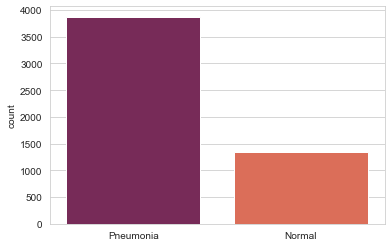

In [11]:
#Counting number of normal and pneumonia sample in data set
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('whitegrid')
sns.countplot(l, palette="rocket")  

Text(0.5, 1.0, 'NORMAL')

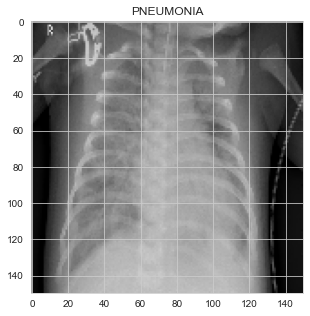

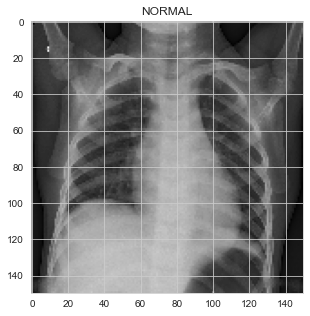

In [14]:
#Example of a pneumonia affected X-ray and a normal X-ray
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [19]:
#Gettin the data set in list form
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [21]:
# Normalizing the data
x_train = np.array(x_train)/255
x_val = np.array(x_val)/255
x_test = np.array(x_test)/255

In [22]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [28]:
# data augmentation to prevent overfitting and handling the imbalance in dataset

augdata = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 32,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.18, # Randomly zoom image 
        width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

augdata.fit(x_train)


In [29]:
#personalizing the model
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization_11 (Batc (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout_9 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 38, 38, 64)       

In [31]:
#Learning rate change function based on Value accuracy to reduce sensitivity to scattered data 
learn_rate_reduc = ReduceLROnPlateau(monitor='val_accuracy', 
                                     patience = 2, 
                                     verbose=1,
                                     factor=0.3, 
                                     min_lr=0.000001)

In [54]:
#Training the model
Fitting_data = model.fit(augdata.flow(x_train,y_train, batch_size = 32) ,
                         epochs = 16 , 
                         validation_data = augdata.flow(x_val, y_val) ,
                         callbacks = [learn_rate_reduc])

Epoch 1/16
163/163 [==============================] - 624s 4s/step - loss: 0.2876 - accuracy: 0.8903 - val_loss: 46.1897 - val_accuracy: 0.5000
Epoch 2/16
163/163 [==============================] - 630s 4s/step - loss: 0.2462 - accuracy: 0.9132 - val_loss: 37.6203 - val_accuracy: 0.5000
Epoch 3/16
163/163 [==============================] - 665s 4s/step - loss: 0.2164 - accuracy: 0.9210 - val_loss: 0.6699 - val_accuracy: 0.6875
Epoch 4/16
163/163 [==============================] - 710s 4s/step - loss: 0.1974 - accuracy: 0.9287 - val_loss: 0.5150 - val_accuracy: 0.8125
Epoch 5/16
163/163 [==============================] - 714s 4s/step - loss: 0.2022 - accuracy: 0.9314 - val_loss: 0.9713 - val_accuracy: 0.5625
Epoch 6/16
163/163 [==============================] - 604s 4s/step - loss: 0.1887 - accuracy: 0.9323 - val_loss: 40.9145 - val_accuracy: 0.5000

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 7/16
163/163 [==============================] - 498s

In [55]:
print("***Loss of the model is - " , model.evaluate(x_test,y_test)[0],"***")
print("***Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%***")

624/624 [==============================] - 18s 29ms/step
***Loss of the model is -  0.2878883780959325 ***
624/624 [==============================] - 22s 35ms/step
***Accuracy of the model is -  91.18589758872986 %***


In [1]:
epochs = [i for i in range(16)]
fig , ax = plt.subplots(1,2)
train_acc = Fitting_data.history['accuracy']
train_loss = Fitting_data.history['loss']
val_acc = Fitting_data.history['val_accuracy']
val_loss = Fitting_data.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

NameError: name 'plt' is not defined

In [58]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [59]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.92      0.94      0.93       390
   Normal (Class 1)       0.90      0.86      0.88       234

           accuracy                           0.91       624
          macro avg       0.91      0.90      0.91       624
       weighted avg       0.91      0.91      0.91       624



In [4]:
cm = confusion_matrix(y_test,predictions)
cm

NameError: name 'y_test' is not defined

In [61]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

In [3]:
plt.figure(figsize = (8,8))
sns.heatmap(cm,cmap= "Greens", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

NameError: name 'cm' is not defined

<Figure size 576x576 with 0 Axes>

In [64]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

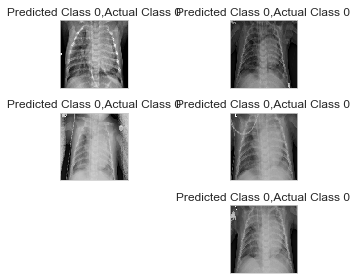

In [65]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

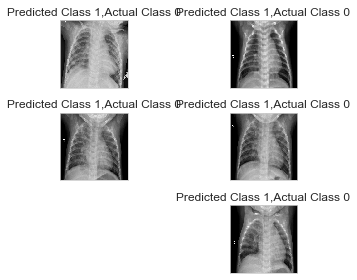

In [66]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1